In [32]:
import numpy as np

dyn_lorenz = {"sigma":10.0, "R":1, "b": 8/3}
# dyn_henon = {"a": 1.4, "b": 0.3}
# x0_henon = np.array([0.0, 0.0])
# x0 = np.array([10.0, 1.0, 0.0])
# x0 = np.array([8.485, 8.485, 27])
x0 = np.array([1.0, 2.0, 1.0])
x_dot = []
x_norm = []
velocity = 0
def lorenz (x0, dyn):
    sigma = dyn['sigma']
    R = dyn['R']
    b = dyn['b']
    x = x0[0]
    y = x0[1]
    z = x0[2]
    
    return np.array([sigma * (y - x), x * (R - z) - y, x * y - b * z])


def RungeKutta (dyn, f, dt, x0):
    x_norm.append(x0)
    # print ("x0:", x0)
    k1 = f(x0, dyn)*dt #[x,y,z]*0.1 example
    # print ("k1:",k1)
    k2 = f(x0+0.5*k1,dyn)*dt
    # print ("k2:",k2)
    k3 = f(x0 + 0.5*k2, dyn)*dt
    # print ("k3:",k3)
    k4 = f(x0 + k3, dyn)*dt
    # print ("k4:",k4)
    x_dot.append(k4)
    x = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    # print ("x dot:",x)
    
    return x

def f_t (dyn, f, dt, x0, T):
    x = np.empty(shape=(len(x0),T))
    x[:, 0] = x0
    for i in range(1,T):
        x[:, i] = RungeKutta(dyn, f, dt, x[:, i-1])
    return x

In [33]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import numpy as np

# rng = np.random.default_rng()

# points = rng.random((10, 3))   # 30 random points in 2-D

# x1 = f_t(dyn_lorenz, lorenz, 0.01, x0, 5000)
# x2 = f_t(dyn_lorenz, lorenz, 0.01, x0, 5000)
# x3 = f_t(dyn_lorenz, lorenz, 0.01, x0, 5000)

In [34]:
r = 0.0000001
points = np.array([  np.random.uniform(0-r, 0+r, size=(200)), 
                 np.random.uniform(0-r, 0+r, size=(200)), 
                 np.random.uniform(0-r, 0+r, size=(200))])
points_include_origin = np.append(points.T,np.array([[0,0,0.1]]),axis=0)
points = points_include_origin.T

In [35]:
points = points.T

In [36]:
points

array([[-7.90803435e-08,  7.42878377e-08, -3.69450160e-08],
       [-2.70749130e-08, -5.13119794e-08, -1.60107497e-08],
       [ 9.03237255e-08, -8.70568062e-08,  2.48327222e-08],
       [-9.89687749e-08, -8.26986758e-08, -7.36747438e-08],
       [-3.64636272e-08, -9.94324663e-08,  4.43916324e-08],
       [-1.60085336e-08, -1.16429727e-08, -8.82251083e-08],
       [-2.82606991e-08, -1.68598433e-08,  9.17432034e-08],
       [ 1.43281312e-09,  6.16934118e-08,  8.44364888e-08],
       [-4.07327207e-08, -4.28421440e-08,  3.24895750e-09],
       [-1.49901227e-08, -6.83381678e-08,  4.06925164e-08],
       [ 9.07393430e-08, -4.13148115e-08, -7.85098112e-08],
       [-3.63073237e-08,  5.42219732e-09,  7.51560258e-08],
       [-8.16280218e-08, -9.41984189e-08,  3.16569431e-08],
       [ 4.65828667e-08, -7.29508611e-08,  3.27181343e-08],
       [-5.07826686e-08, -1.91532505e-08,  9.58194315e-08],
       [-4.69713350e-08,  2.38305469e-08,  7.14619252e-08],
       [-9.65299764e-09, -2.60819954e-08

In [37]:
points_traj = []
for i in points:
    points_traj.append(f_t(dyn_lorenz, lorenz, 0.01, i, 1000).T)
points_traj = np.array(points_traj)

In [39]:
points_traj[:,0]

array([[-7.90803435e-08,  7.42878377e-08, -3.69450160e-08],
       [-2.70749130e-08, -5.13119794e-08, -1.60107497e-08],
       [ 9.03237255e-08, -8.70568062e-08,  2.48327222e-08],
       [-9.89687749e-08, -8.26986758e-08, -7.36747438e-08],
       [-3.64636272e-08, -9.94324663e-08,  4.43916324e-08],
       [-1.60085336e-08, -1.16429727e-08, -8.82251083e-08],
       [-2.82606991e-08, -1.68598433e-08,  9.17432034e-08],
       [ 1.43281312e-09,  6.16934118e-08,  8.44364888e-08],
       [-4.07327207e-08, -4.28421440e-08,  3.24895750e-09],
       [-1.49901227e-08, -6.83381678e-08,  4.06925164e-08],
       [ 9.07393430e-08, -4.13148115e-08, -7.85098112e-08],
       [-3.63073237e-08,  5.42219732e-09,  7.51560258e-08],
       [-8.16280218e-08, -9.41984189e-08,  3.16569431e-08],
       [ 4.65828667e-08, -7.29508611e-08,  3.27181343e-08],
       [-5.07826686e-08, -1.91532505e-08,  9.58194315e-08],
       [-4.69713350e-08,  2.38305469e-08,  7.14619252e-08],
       [-9.65299764e-09, -2.60819954e-08

In [ ]:
def pt_len_cal(nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - nodes[index])**2, axis=1)
    return dist_2

def closest_node ( dist, scalmn, scalmx):
    dist[dist < scalmn] = np.inf
    dist[dist > scalmx] = np.inf
    return np.argmin(dist), dist[np.argmin(dist)]


angles = []
for i in range(1000):
    angle_temp = []
    

In [29]:
le_ep = []
hull = []
points_here = []
for i in range(500):
    if (i + 1 < 500):
        hullt0 = ConvexHull(points_traj[:,i]).volume
        hullt1 = ConvexHull(points_traj[:,i+1]).volume
        hull.append(hullt0)
        points_here.append(ConvexHull(points_traj[:,i]).points)
        le_ep.append(np.log(hullt1/hullt0))
    else:
        break
print (sum(le_ep)/len(le_ep))

-0.09255230563884778


In [30]:
points_here

[array([[ 5.06735766e-08, -3.17770864e-08,  9.07061992e-08],
        [ 9.34641874e-08, -8.66443071e-08,  9.57688862e-08],
        [-4.74686962e-08, -8.10464100e-08,  8.09925599e-08],
        [ 8.02006682e-08,  1.94666479e-08,  2.47606037e-08],
        [-6.60088653e-08,  3.60151249e-08, -5.18465009e-08],
        [ 1.06502291e-08, -7.44994546e-08, -5.45291769e-08],
        [-6.50521882e-08, -8.56180361e-08, -4.35477285e-08],
        [-1.40956666e-08,  2.31793823e-10, -7.65875901e-08],
        [-4.62540343e-08, -9.41321070e-08, -9.94591710e-08],
        [ 8.78540532e-08,  5.05375860e-08, -1.75311071e-08],
        [ 8.12370169e-08,  8.93232316e-08, -2.72446891e-08],
        [ 9.90250080e-08,  4.01633139e-08,  7.91282614e-08],
        [-3.20441804e-08, -8.27238819e-08, -2.98299013e-08],
        [ 4.35588963e-08, -8.07470676e-08, -9.68973172e-08],
        [-8.84838472e-08,  5.85470389e-08, -4.17627262e-08],
        [ 3.97114797e-08,  9.95994616e-08,  9.60847607e-08],
        [ 8.57630116e-08

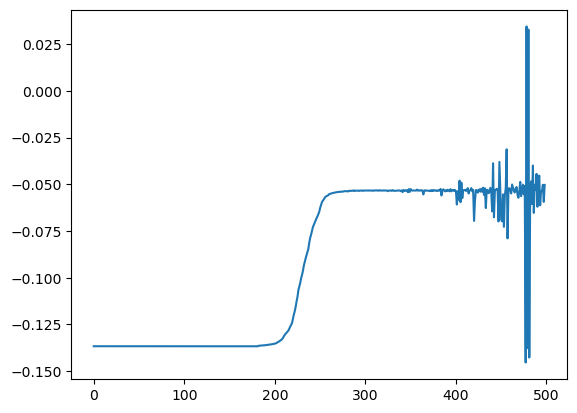

In [18]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.arange(0, len(le_ep))
plt.plot(ypoints, le_ep)
plt.show() 

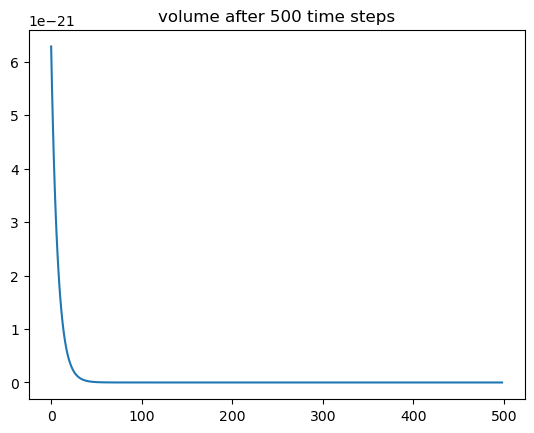

In [19]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.arange(0, len(hull))
plt.plot(ypoints, hull)
plt.title('volume after 500 time steps')
plt.show() 

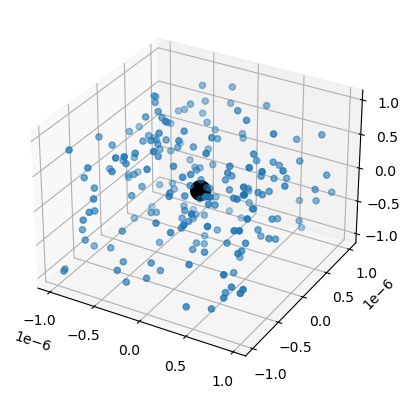

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0, s=200, c='black', marker='o')
# zs = (zs-np.min(zs))/(np.max(zs)-np.min(zs))

cube = ax.scatter(points.T[0], points.T[1], points.T[2])


plt.show()

In [168]:
# which le coordinate is this?
# is this really the le at [0,0,0]

In [169]:
# start with lorenz
# convex hull, cal max volumn

In [170]:
# appro inter convex hull
# replace convex hull with policy -> find this maximum volume implicitly